<a href="https://colab.research.google.com/github/lalmani-das/Bike-Sales-data-exploratory-data-analysis/blob/main/project_olympics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The ‘dataset on the modern Olympic Games’ comprises all the Games from Athens
1986 to Rio 2016. In this analysis, our goal is to shed light on major patterns in Olympic history.
How many athletes, sports, and nations are there? Where do most athletes
come from? Who wins medals? What are the characteristic of the athletes (e.g.,
gender and physical size)?

Olympics data contains 271,116 rows and 17 columns with details of athletes,
events and medals won.
Each row corresponds to an individual athlete competing in an individual
Olympic event (athlete-events). The columns are:
ID - Unique number for each
athlete
Name - Athlete's name
Sex - M or F
Age - Integer
Height - In centimetres
Weight - In kilograms
Team - Team name
NOC - National Olympic Committee 3-letter code
Games - Year and season
Year - Integer
Season - Summer or Winter
City - Host city
Sport - Sport
Event - Event
Medal - Gold, Silver, Bronze, or NA`
Region - Country that has won the title
Notes - Special Notes related to that event

In this case study, we are going to explore the Olympic dataset. But before we get insights from the dataset let's understand the dataset. To understand the dataset we first read the dataset and print the dataset.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/olympics.csv')
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


Print the shape of the dataset.

In [ ]:
df.shape

(271116, 17)

Describe the Age column of the dataset on various parameters using describe API.

In [ ]:
age = df['Age']


In [ ]:
age_desc = age.describe()
age_desc

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [ ]:
age_desc[1:2]

mean    25.556898
Name: Age, dtype: float64

Printing the list of columns that have numeric datatypes

In [ ]:
obj_cols = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.tolist()
obj_cols

['ID', 'Age', 'Height', 'Weight', 'Year']

Printing the columns that contain null values along with the count of null values present in each column.

In [ ]:
for x in df.columns:
  if df[x].isnull().sum() > 0:
    print(x,'-', df[x].isnull().sum())

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


We have missing values in the above displayed columns. We have to handle those missing values. For the columns "Height, Weight and notes", we are going to drop these columns as they are not required in our further analysis

In [ ]:
del df['Height']
del df['Weight']
del df['notes']

In [ ]:
df.tail()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
271111,135569,Andrzej ya,M,29.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland
271112,135570,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland
271113,135570,Piotr ya,M,27.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland
271115,135571,Tomasz Ireneusz ya,M,34.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland


replacing missing values in 'Medal' with 'DNW'. DNW means Did not win.

In [ ]:
df['Medal'].fillna('DNW', inplace = True)


printing the count of number of different medals from Medal column

In [ ]:
df['Medal'].value_counts()

DNW       231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

#Statistical Analysis

We need to fill in the missing values of the 'Age' column. For this, we find the mean of the 'Age' column and fill the missing values with the obtained mean.

Calculating mean of the 'Age' column.

In [ ]:
age_mean = df.groupby('Sport')['Age'].mean()
print(age_mean)

Sport
Aeronautics         26.000000
Alpine Skiing       23.205462
Alpinism            38.812500
Archery             27.935226
Art Competitions    45.901009
                      ...    
Tug-Of-War          29.309524
Volleyball          25.183800
Water Polo          25.659627
Weightlifting       25.502010
Wrestling           25.798289
Name: Age, Length: 66, dtype: float64


Filling the missing values with the mean.

In [ ]:
for Sport in age_mean.index:
    df.loc[(df['Sport'] == Sport) & (df['Age'].isnull()), 'Age'] = age_mean[Sport]
# bc=df['Age'].mean()
# print(round(bc, 0))

Checking for null values in 'Age' column.

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
df['Age'].mean()

25.607877864620487

In [ ]:
bc=df['Age'].mean()
print(round(bc, 0))

26.0


In [ ]:
bc=df['Age'].mean()
print(int(round(bc, 0)))

26


<function matplotlib.pyplot.show(close=None, block=None)>

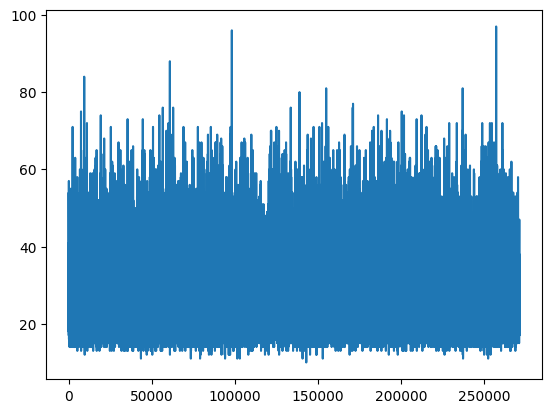

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
age = df['Age']
arr = np.array(age)
plt.plot(arr)
plt.show

In [ ]:
skewness_Age = df['Age'].skew()
skewness_Age

1.7455145308624003

The skew() function returns the skewness of a column. If the skewness is positive, the distribution is skewed to the right (i.e., has a long right tail). If the skewness is negative, the distribution is skewed to the left (i.e., has a long left tail). If the skewness is zero, the distribution is symmetric.

**Is the overall distribution of Gold Medals tally of India, left or negatively skewed?**

Yes, the overall distribution of Gold Medals tally of India is left or negatively skewed.

Year  Medal
1924  Gold      7
1928  Gold     14
1932  Gold     15
1936  Gold     19
1948  Gold     20
1952  Gold     14
1956  Gold     17
1964  Gold     15
1980  Gold     16
2008  Gold      1
Name: Medal, dtype: int64
Left Skewed


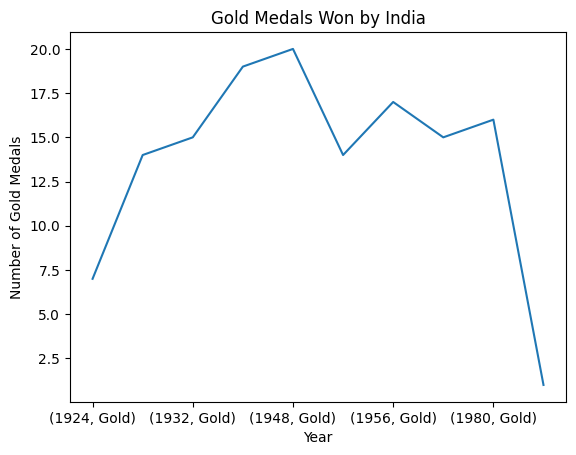

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

gold_india = df.loc[(df['Medal'] == 'Gold') & (df['region'] == 'India')]
#gold_india.head()
gold_count = gold_india.groupby("Year")["Medal"].value_counts()
print(gold_count)
if stats.skew(gold_count, bias=False) > 0:
    print("Right Skewed")
else:
    print("Left Skewed")


# create a bar plot of gold medal counts by year
gold_count.plot()

# set the plot title and axis labels
plt.title('Gold Medals Won by India')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')

# display the plot
plt.show()


Which event is most popular in terms of the number of players?

Athletics is the most popular in terms of no. of players.

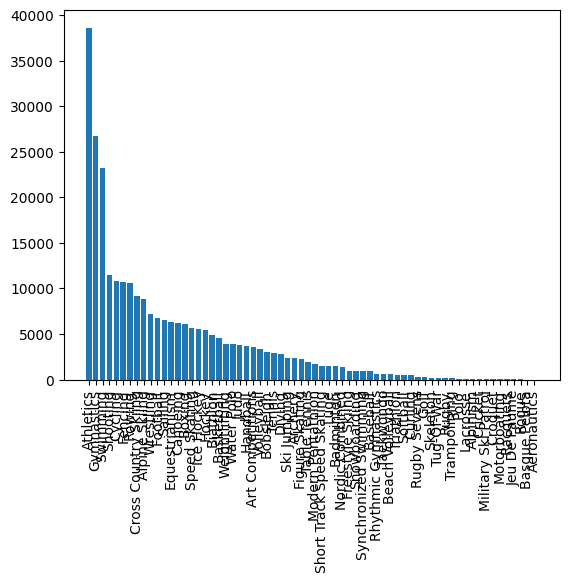

In [ ]:
graf = df['Sport'].value_counts()
x = graf.index
y= graf.values
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

Axes(0.125,0.11;0.775x0.77)


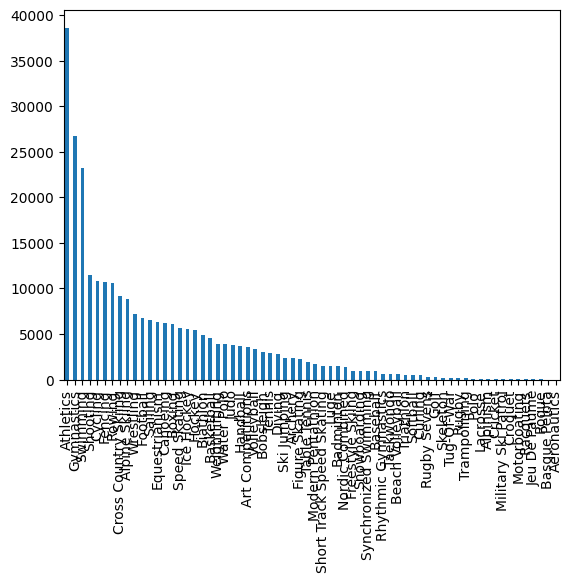

In [ ]:

graf = df['Sport'].value_counts()
g = graf.plot(kind='bar')
print(g)


In [ ]:
f_gold = df.loc[(df['Medal'] == 'Gold') & (df['Sex'] == 'F')]
f_gold['Sport'].value_counts()
print('Swimming')

Swimming


In [ ]:
df.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


Which Sport has the most number of Gold Medals so far?

Athletics has got the most no. of gold medals so far followed by Swimming and Rowing

Athletics


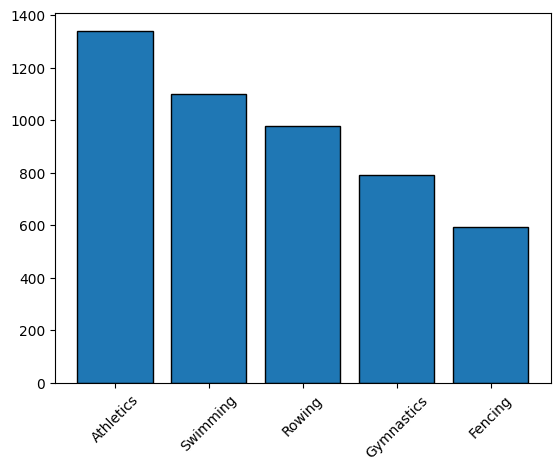

In [ ]:
sport_gold = df.loc[(df['Medal'] == 'Gold')]
events = sport_gold['Sport'].value_counts()

five_largest = events.nlargest(5) #Top 5 events
five_largest
indexes = five_largest.index
values = five_largest.values
print(indexes[0]) #printing sport
plt.bar(indexes,values,edgecolor='black')
plt.xticks(rotation = 45)
plt.show()

In how many cities Olympics been held so far?

We find that Olympics has been held in 42 cities so far

42


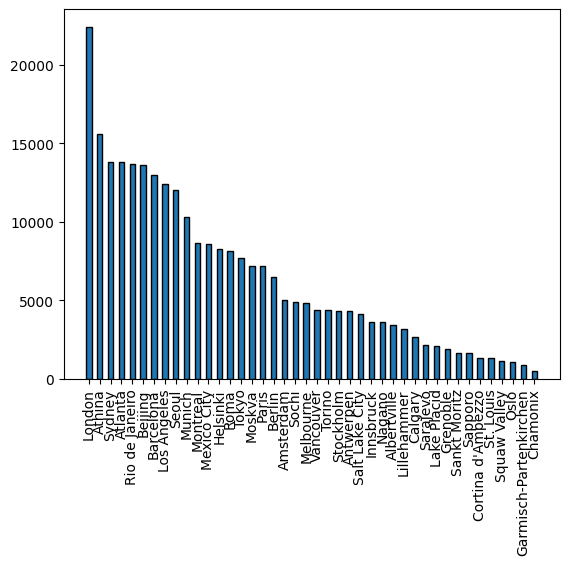

In [ ]:
city = df['City'].value_counts()
x = city.index
y = city.values
print(len(x))
plt.bar(x,y,width = 0.5, edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show()


Which sport is having the most number of medals so far?

From the graph below, we can easily notice that 'Athletics' has most number of medals so far. We can also see the top 5 sports with highest medals.

Athletics


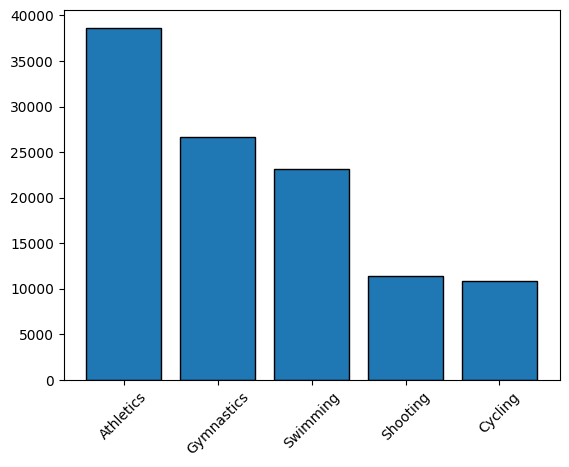

In [ ]:

med = df[df['Medal'].notnull()]

spo = med["Sport"].value_counts()




five_largest = spo.nlargest(5) #Top 5 events
five_largest
indexes = five_largest.index
values = five_largest.values
print(indexes[0]) #printing sport
plt.bar(indexes,values,edgecolor='black')
plt.xticks(rotation = 45)
plt.show()


Calculate the probability distribution of the Age column

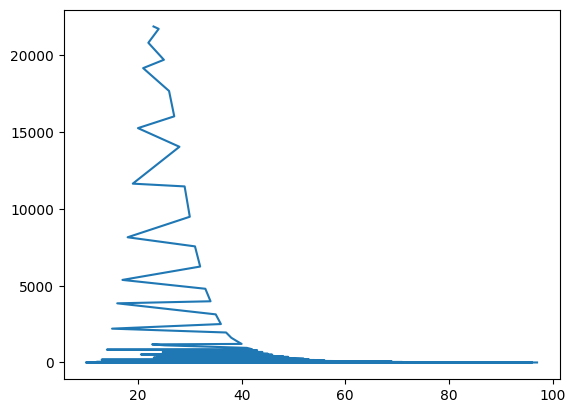

23.000000    0.080685
24.000000    0.080113
22.000000    0.076772
25.000000    0.072688
21.000000    0.070686
               ...   
96.000000    0.000004
10.000000    0.000004
26.240761    0.000004
26.532911    0.000004
97.000000    0.000004
Name: Age, Length: 124, dtype: float64


In [ ]:
age3 = df['Age'].value_counts()

x = age3.index
y = age3.values
plt.plot(x,y)
plt.show()

age_probs = age3 / len(df['Age'])

# print the resulting probability distribution
print(age_probs)

In [ ]:
df.head(10)

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
7,5,Christine Jacoba Aaftink,F,25.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands
8,5,Christine Jacoba Aaftink,F,27.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
9,5,Christine Jacoba Aaftink,F,27.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",DNW,Netherlands


In [ ]:
age = df.loc[(df["Sport"] == 'Swimming') & (df['Year'] >= 2000) & (df['Year']<= 2016) & (df['Age'])]
age['Age'].mean()
age['Age'].std()

3.822306243794727

Standardise the age of all the participants participating in the Shooting Competition and calculate this standardised data's mean and standard deviation.

In [ ]:
data = df.loc[df['Sport'] == 'Shooting']
data2 = data['Age']


mean = np.mean(data2)
std = np.std(data2)
X_stand = [(x-mean) / std for x in data2]

mean_stand = np.mean(X_stand)
std_stand = np.std(X_stand)

print(mean_stand)
print(std_stand)

6.20669755206237e-19
1.0


In [ ]:
df.head(1)

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China


In [ ]:
dataX = df.loc[df['City'] == 'London']
dataX1 = dataX.loc[dataX['Medal'] == "Gold"]
print(dataX1)
dataY = df.loc[df['City'] != 'London']
dataY1 = dataY.loc[dataY['Medal']=='Gold']
#dataY1

            ID                     Name Sex   Age         Team  NOC  \
42          17  Paavo Johannes Aaltonen   M  28.0      Finland  FIN   
44          17  Paavo Johannes Aaltonen   M  28.0      Finland  FIN   
48          17  Paavo Johannes Aaltonen   M  28.0      Finland  FIN   
174         73                Luc Abalo   M  27.0       France  FRA   
1126       629        William Accambray   M  24.0       France  FRA   
...        ...                      ...  ..   ...          ...  ...   
270326  135228      Epke Jan Zonderland   M  26.0  Netherlands  NED   
270434  135269                  Zou Kai   M  24.0        China  CHN   
270435  135269                  Zou Kai   M  24.0        China  CHN   
270440  135270              Zou Shiming   M  31.0        China  CHN   
270896  135474     Albert Hermann Zrner   M  18.0      Germany  GER   

              Games  Year  Season    City       Sport  \
42      1948 Summer  1948  Summer  London  Gymnastics   
44      1948 Summer  1948  Summer